In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\daisy\Downloads\ott_data.csv')

In [3]:
#tv = pd.read_csv(r'C:\Users\daisy\Downloads\tv_shows.csv')

In [4]:
#tv.columns

In [5]:
df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime_Video,Disney,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [6]:
df.shape

(16744, 16)

In [7]:
df['Type'].value_counts()

0    16744
Name: Type, dtype: int64

In [8]:
df['Year'].value_counts()

2017    1401
2018    1285
2016    1206
2015    1065
2014     986
        ... 
1924       1
1912       1
1916       1
1917       1
1902       1
Name: Year, Length: 109, dtype: int64

In [9]:
df['Title'].duplicated().sum()

0

<AxesSubplot:>

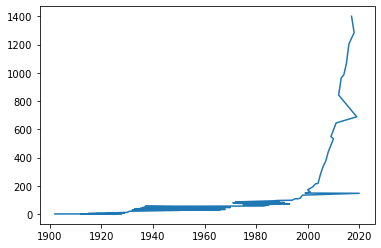

In [10]:
df['Year'].value_counts().plot() # As for all, majority of movies from 2000s, 2010s

In [11]:
df['Overall'] = df.apply(lambda row: row.Netflix + row.Hulu +row.Disney+row.Prime_Video, axis=1)

In [12]:
df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime_Video,Disney,Type,Directors,Genres,Country,Language,Runtime,Overall
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,1
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,1
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,1
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,2


In [13]:
df['Overall'].value_counts()

1    16117
2      617
3       10
Name: Overall, dtype: int64

In [14]:
conditions = [
    (df['Overall'] ==1),
    (df['Overall'] ==2),
    (df['Overall'] ==3)
    ]

# create a list of the values we want to assign for each condition
values = ['Exclusive', 'Two_brands', 'Three_brands']

# create a new column and use np.select to assign values to it using our lists as arguments
df['title_types'] = np.select(conditions, values)

In [15]:
df_exclusive = df[df['Overall']==1]

In [16]:
df_exclusive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16117 entries, 0 to 16743
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16117 non-null  int64  
 1   Title            16117 non-null  object 
 2   Year             16117 non-null  int64  
 3   Age              6970 non-null   object 
 4   IMDb             15551 non-null  float64
 5   Rotten Tomatoes  4837 non-null   object 
 6   Netflix          16117 non-null  int64  
 7   Hulu             16117 non-null  int64  
 8   Prime_Video      16117 non-null  int64  
 9   Disney           16117 non-null  int64  
 10  Type             16117 non-null  int64  
 11  Directors        15418 non-null  object 
 12  Genres           15846 non-null  object 
 13  Country          15690 non-null  object 
 14  Language         15531 non-null  object 
 15  Runtime          15539 non-null  float64
 16  Overall          16117 non-null  int64  
 17  title_types 

In [17]:
df_exclusive['Netflix']=df_exclusive['Netflix']

<ipython-input-17-a19654f6422d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclusive['Netflix']=df_exclusive['Netflix']


In [18]:
df_exclusive[df_exclusive.columns[6:10]]

,Netflix,Hulu,Prime_Video,Disney
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
5,1,0,0,0
...,...,...,...,...
16739,0,0,0,1
16740,0,0,0,1
16741,0,0,0,1
16742,0,0,0,1


In [19]:
df_exclusive['OTT']=df_exclusive[df_exclusive.columns[6:10]].idxmax(axis=1)

<ipython-input-19-a5352c7c80c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclusive['OTT']=df_exclusive[df_exclusive.columns[6:10]].idxmax(axis=1)


<AxesSubplot:xlabel='OTT', ylabel='count'>

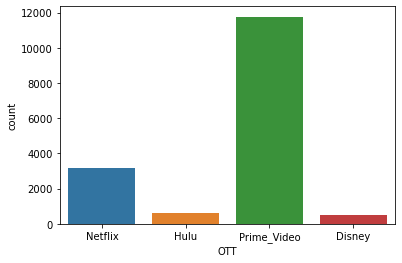

In [20]:
# How many exclusive titles do they have?
# surprisingly, Prime Video has the most exclusive titles. 
sns.countplot(x="OTT",data=df_exclusive)

In [21]:
# So, Do they have high-quality exclusive titles or just bunch of cheap ones?
ratings=df_exclusive.groupby("OTT")["IMDb"].mean()

In [22]:
ratings

OTT
Disney         6.433333
Hulu           6.152698
Netflix        6.265322
Prime_Video    5.752731
Name: IMDb, dtype: float64

In [23]:
ratings =ratings.reset_index()

<AxesSubplot:xlabel='OTT', ylabel='IMDb'>

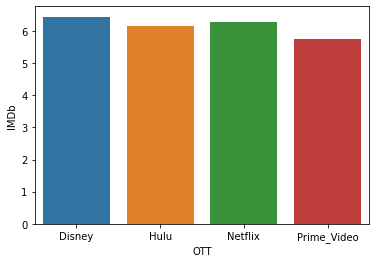

In [24]:
sns.barplot(x='OTT', y='IMDb', data=ratings) 
#Even though, prime video has more exclusive titles but ratings are lower than average--IMBb


In [25]:
df_exclusive["Rotten Tomatoes"]=df_exclusive["Rotten Tomatoes"].str.replace("%","")

<ipython-input-25-f8092ec349ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclusive["Rotten Tomatoes"]=df_exclusive["Rotten Tomatoes"].str.replace("%","")


In [26]:
df_exclusive["Rotten Tomatoes"]=df_exclusive["Rotten Tomatoes"].apply(float)
df_exclusive["Rotten Tomatoes"]=df_exclusive["Rotten Tomatoes"]*0.01

<ipython-input-26-9d8aeefa3af8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclusive["Rotten Tomatoes"]=df_exclusive["Rotten Tomatoes"].apply(float)
<ipython-input-26-9d8aeefa3af8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclusive["Rotten Tomatoes"]=df_exclusive["Rotten Tomatoes"]*0.01


<AxesSubplot:xlabel='OTT', ylabel='Rotten Tomatoes'>

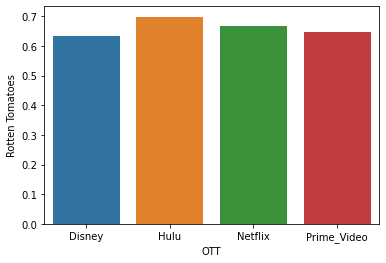

In [27]:
# It looks like Hulu has more unique titles, on the other hands Disney has soso.
rotten=df_exclusive.groupby("OTT")["Rotten Tomatoes"].mean()
rotten =rotten.reset_index()
sns.barplot(x='OTT', y='Rotten Tomatoes', data=rotten) 

<AxesSubplot:xlabel='OTT', ylabel='count'>

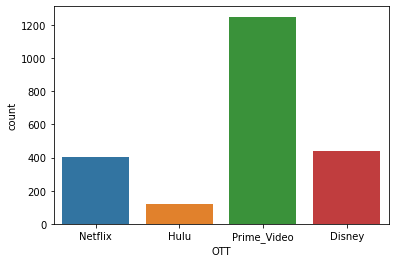

In [28]:
# How about age levels?
all=df_exclusive[(df_exclusive['Age']=='all')|(df_exclusive['Age']=='7+')]
sns.countplot(x='OTT', data=all) 

<AxesSubplot:xlabel='OTT', ylabel='count'>

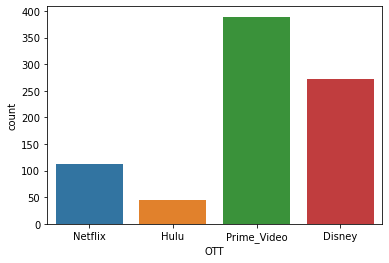

In [29]:
# How about age levels?
all=df_exclusive[(df_exclusive['Age']=='all')]
sns.countplot(x='OTT', data=all) 

<AxesSubplot:xlabel='OTT', ylabel='count'>

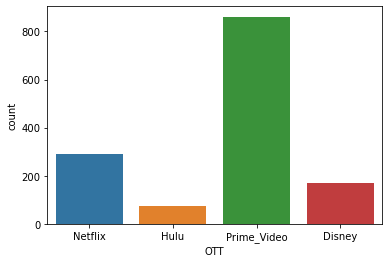

In [30]:
seven=df_exclusive[df_exclusive['Age']=='7+']
sns.countplot(x='OTT', data=seven) 

In [31]:
df_exclusive['Age'].value_counts()

18+    3294
7+     1397
13+    1153
all     819
16+     307
Name: Age, dtype: int64

<AxesSubplot:xlabel='OTT', ylabel='Rotten Tomatoes'>

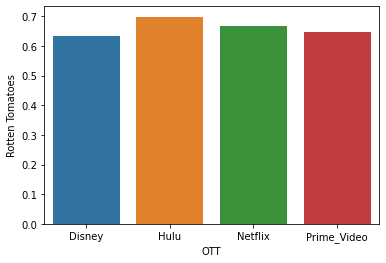

In [33]:
sns.barplot(x='OTT', y='Rotten Tomatoes', data=rotten) 

<AxesSubplot:xlabel='OTT', ylabel='Runtime'>

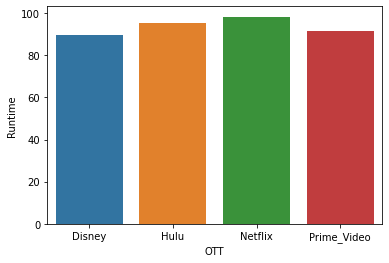

In [34]:
#duration: Are they different? netflix is a bit longer, disney is relatively shorter

time=df_exclusive.groupby("OTT")["Runtime"].mean()
time =time.reset_index()
sns.barplot(x='OTT', y='Runtime', data=time) 

In [41]:
dummy_genres = df_exclusive['Genres'].str.get_dummies(sep=',')

In [42]:
dummy_genres.head(10)

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,1,1,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
10,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [45]:
#test= pd.concat([df_exclusive,dummy_genres,df_exclusive['Genres']], axis=1)

In [46]:
test.head(10)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime_Video,Disney,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,Genres
0,1,Inception,2010,13+,8.8,0.87,1,0,0,0,...,0,0,1,0,0,0,1,0,0,"Action,Adventure,Sci-Fi,Thriller"
1,2,The Matrix,1999,18+,8.7,0.87,1,0,0,0,...,0,0,1,0,0,0,0,0,0,"Action,Sci-Fi"
2,3,Avengers: Infinity War,2018,13+,8.5,0.84,1,0,0,0,...,0,0,1,0,0,0,0,0,0,"Action,Adventure,Sci-Fi"
3,4,Back to the Future,1985,7+,8.5,0.96,1,0,0,0,...,0,0,1,0,0,0,0,0,0,"Adventure,Comedy,Sci-Fi"
5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,0.97,1,0,0,0,...,0,0,1,0,0,0,0,0,0,"Animation,Action,Adventure,Family,Sci-Fi"
7,8,Django Unchained,2012,18+,8.4,0.87,1,0,0,0,...,0,0,0,0,0,0,0,0,1,"Drama,Western"
8,9,Raiders of the Lost Ark,1981,7+,8.4,0.95,1,0,0,0,...,0,0,0,0,0,0,0,0,0,"Action,Adventure"
9,10,Inglourious Basterds,2009,18+,8.3,0.89,1,0,0,0,...,0,0,0,0,0,0,0,1,0,"Adventure,Drama,War"
10,11,Taxi Driver,1976,18+,8.3,0.95,1,0,0,0,...,0,0,0,0,0,0,0,0,0,"Crime,Drama"
12,13,Pan's Labyrinth,2006,18+,8.2,0.95,1,0,0,0,...,0,0,0,0,0,0,0,1,0,"Drama,Fantasy,War"


In [50]:
#test.iloc[8,:] # test

ID                              11
Title                  Taxi Driver
Year                          1976
Age                            18+
IMDb                           8.3
Rotten Tomatoes               0.95
Netflix                          1
Hulu                             0
Prime_Video                      0
Disney                           0
Type                             0
Directors          Martin Scorsese
Genres                 Crime,Drama
Country              United States
Language           English,Spanish
Runtime                        114
Overall                          1
title_types              Exclusive
OTT                        Netflix
Action                           0
Adventure                        0
Animation                        0
Biography                        0
Comedy                           0
Crime                            1
Documentary                      0
Drama                            1
Family                           0
Fantasy             

In [52]:
df_genres= pd.concat([df_exclusive,dummy_genres], axis=1)

In [53]:
df_genres.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime_Video', 'Disney', 'Type', 'Directors', 'Genres',
       'Country', 'Language', 'Runtime', 'Overall', 'title_types', 'OTT',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [56]:
df_genres.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime_Video,Disney,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,1,Inception,2010,13+,8.8,0.87,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,2,The Matrix,1999,18+,8.7,0.87,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,Avengers: Infinity War,2018,13+,8.5,0.84,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,Back to the Future,1985,7+,8.5,0.96,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,0.97,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


<AxesSubplot:xlabel='OTT', ylabel='count'>

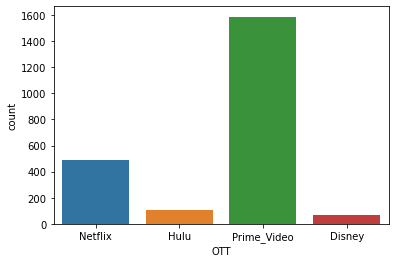

In [55]:
# what is the best decision for Romance lover?
Romance = df_genres[df_genres['Romance']==1]
sns.countplot(x='OTT', data=Romance) 

In [60]:
count_rm =Romance.groupby('OTT').agg({'ID': 'count'})
count_rm

,ID
OTT,
Disney,70
Hulu,104
Netflix,489
Prime_Video,1585


In [61]:
#percents_df = count_rm.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
#percents_df

,ID
OTT,
Disney,100.0
Hulu,100.0
Netflix,100.0
Prime_Video,100.0


In [ ]:
time=Romance.groupby("OTT")["Runtime"].mean()
time =time.reset_index()
sns.barplot(x='OTT', y='Runtime', data=time) 
sns.countplot(x='OTT', data=seven) 

# Netflix

In [25]:
netflix = df[df['Netflix']==1]

In [73]:
netflix.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [31]:
netflix.describe()

,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,3560.000000,3560.000000,3442.000000,3560.0,3560.000000,3560.000000,3560.000000,3560.0,3341.000000
mean,1780.500000,2013.299719,6.252963,1.0,0.007022,0.096910,0.002809,0.0,98.912900
std,1027.827807,8.794287,1.139091,0.0,0.083517,0.295877,0.052933,0.0,28.346391
min,1.000000,1942.000000,1.400000,1.0,0.000000,0.000000,0.000000,0.0,1.000000
25%,890.750000,2013.000000,5.600000,1.0,0.000000,0.000000,0.000000,0.0,86.000000
50%,1780.500000,2016.000000,6.300000,1.0,0.000000,0.000000,0.000000,0.0,98.000000
75%,2670.250000,2018.000000,7.100000,1.0,0.000000,0.000000,0.000000,0.0,114.000000
max,3560.000000,2020.000000,9.300000,1.0,1.000000,1.000000,1.000000,0.0,224.000000


In [46]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3560 entries, 0 to 3559
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               3560 non-null   int64  
 1   Title            3560 non-null   object 
 2   Year             3560 non-null   int64  
 3   Age              1677 non-null   object 
 4   IMDb             3442 non-null   float64
 5   Rotten Tomatoes  1427 non-null   object 
 6   Netflix          3560 non-null   int64  
 7   Hulu             3560 non-null   int64  
 8   Prime Video      3560 non-null   int64  
 9   Disney+          3560 non-null   int64  
 10  Type             3560 non-null   object 
 11  Directors        3376 non-null   object 
 12  Genres           3469 non-null   object 
 13  Country          3407 non-null   object 
 14  Language         3382 non-null   object 
 15  Runtime          3341 non-null   float64
dtypes: float64(2), int64(6), object(8)
memory usage: 472.8+ KB


In [41]:
netflix.isnull().sum()

ID                    0
Title                 0
Year                  0
Age                1883
IMDb                118
Rotten Tomatoes    2133
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
Directors           184
Genres               91
Country             153
Language            178
Runtime             219
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

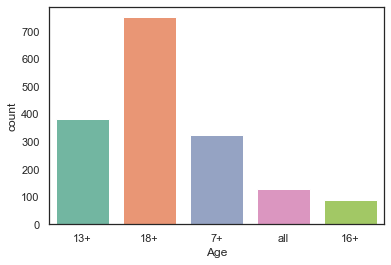

In [71]:
sns.countplot(x='Age', data=netflix, palette="Set2") # A distribution of age level of movies

In [ ]:
sns.countplot(x='Direct', data=netflix)

In [66]:
netflix['Directors'].value_counts()

Raúl Campos,Jan Suter                                      20
Marcus Raboy                                               16
Jay Karas                                                  14
Jay Chapman                                                12
Shannon Hartman                                             9
                                                           ..
Ahmed Yousry,Hazem Fouda                                    1
Leanne Gater                                                1
Jeremy Chipper,Mike Smith,John Paul Tremblay,Robb Wells     1
Danny Boyle                                                 1
Ciarán Foy                                                  1
Name: Directors, Length: 2694, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Directors'>

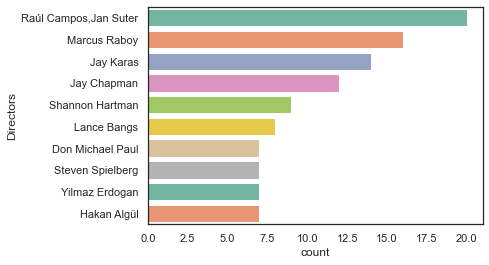

In [70]:
sns.countplot(y="Directors", data=netflix, palette="Set2", #we can see which directors have a good partnership with Netflix
              order=netflix['Directors'].value_counts().iloc[:10].index)

In [ ]:
# Does the avg.rating of top10 directors high than the others?